In [5]:
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model
import cv2
import torch
from torchvision import transforms
import matplotlib.pyplot as plt

In [7]:
# Load the image using OpenCV
image = cv2.imread('/Users/bhoumik/Documents/Projects/Satellite CV Project/Dataset/NAIP Dataset/Evaluation/mesa_rgb.tif', cv2.IMREAD_UNCHANGED)

if image is not None:
    print("Image loaded successfully")
    
    # Convert the image to 32-bit floating point before color conversion
    image = image.astype('float32')
    
    # Convert the image from BGR to RGB (OpenCV uses BGR by default)
    if image.ndim == 3:  
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    transform = transforms.ToTensor()
    image_tensor = transform(image)
    
    print(image_tensor)
else:
    print("Failed to load image")



Image loaded successfully
tensor([[[167.0000, 192.0000, 198.0000,  ..., 146.5000, 145.0000, 144.5000],
         [167.0000, 192.0000, 199.0000,  ..., 126.0000, 126.5000, 129.5000],
         [157.0000, 190.0000, 198.0000,  ..., 122.0000, 120.0000, 121.0000],
         ...,
         [121.0000, 164.0000, 186.0000,  ..., 182.0000, 141.0000, 143.0000],
         [113.0000, 152.0000, 180.0000,  ..., 180.0000, 139.0000, 143.0000],
         [ 89.0000, 141.0000, 172.0000,  ..., 181.0000, 139.0000, 143.0000]],

        [[172.0000, 188.0000, 196.0000,  ..., 143.0000, 147.5000, 143.0000],
         [171.0000, 189.0000, 196.0000,  ..., 126.5000, 130.5000, 129.5000],
         [156.0000, 190.0000, 196.0000,  ..., 120.0000, 119.0000, 121.0000],
         ...,
         [109.0000, 157.0000, 175.0000,  ..., 182.0000, 138.0000, 139.0000],
         [112.0000, 144.0000, 172.0000,  ..., 177.0000, 139.0000, 141.0000],
         [ 99.0000, 138.0000, 166.0000,  ..., 176.0000, 139.0000, 139.0000]],

        [[172.0000

In [8]:
if image_tensor.is_cuda:
    image_tensor = image_tensor.cpu()


image_np = image_tensor.permute(1, 2, 0).numpy()

if image_np.max() > 1:
    image_np = image_np / 255.0



In [9]:
image_np

array([[[0.654902  , 0.6745098 , 0.6745098 ],
        [0.7529412 , 0.7372549 , 0.7058824 ],
        [0.7764706 , 0.76862746, 0.7490196 ],
        ...,
        [0.5745098 , 0.56078434, 0.58235294],
        [0.5686275 , 0.57843137, 0.58235294],
        [0.56666666, 0.56078434, 0.58235294]],

       [[0.654902  , 0.67058825, 0.6666667 ],
        [0.7529412 , 0.7411765 , 0.7137255 ],
        [0.78039217, 0.76862746, 0.7490196 ],
        ...,
        [0.49411765, 0.49607843, 0.53333336],
        [0.49607843, 0.5117647 , 0.54313725],
        [0.50784314, 0.50784314, 0.54901963]],

       [[0.6156863 , 0.6117647 , 0.6392157 ],
        [0.74509805, 0.74509805, 0.70980394],
        [0.7764706 , 0.76862746, 0.7529412 ],
        ...,
        [0.47843137, 0.47058824, 0.5058824 ],
        [0.47058824, 0.46666667, 0.50392157],
        [0.4745098 , 0.4745098 , 0.50980395]],

       ...,

       [[0.4745098 , 0.42745098, 0.44313726],
        [0.6431373 , 0.6156863 , 0.57254905],
        [0.7294118 , 0

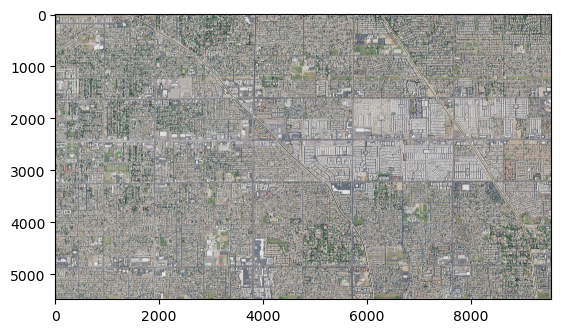

In [10]:
plt.imshow(image_np)
plt.axis('on') 
plt.show()

In [11]:
if image_np.dtype == np.float32: 
    image_np = (255 * image_np).astype(np.uint8)

image = Image.fromarray(image_np)

image.save('/Users/bhoumik/Documents/Projects/Satellite CV Project/Dataset/NAIP Dataset/Evaluation/vegas_rgb.jpg')


## For LST